# Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_viz.csv')
data['dateSeance'] = pd.to_datetime(data['dateSeance'])

data = data.sort_values(by=['dateSeance', 'sportif'])

for m in data.columns[3:]:
    data[f'{m}_tdc'] = data.groupby('sportif')[m].transform(lambda x: x.rolling(7, min_periods=1).quantile(.5).ewm(span=7).mean())
    data[f'{m}_mediane'] = data.groupby('sportif')[m].transform('median')

In [3]:
data_s = data[data['sportif']=='Sportif_26'].drop_duplicates(subset='dateSeance').reset_index(drop=True).copy()
data_s['semaine'] = data_s['dateSeance'].dt.isocalendar().week
data_s = data_s.iloc[:70]

In [4]:
data_sp = data[data['sportif'].isin(['Sportif_13', 'Sportif_26'])].drop_duplicates(subset=['sportif', 'dateSeance']).reset_index(drop=True).copy()
data_sp['semaine'] = data_sp['dateSeance'].dt.isocalendar().week
data_sp = data_sp.groupby('sportif').head(70)

# 1. Principes

In [ ]:
sns.plot(data=, x='', y='', hue='', size='', row='', col='')

## 2. Relation

### 2.1 relplot

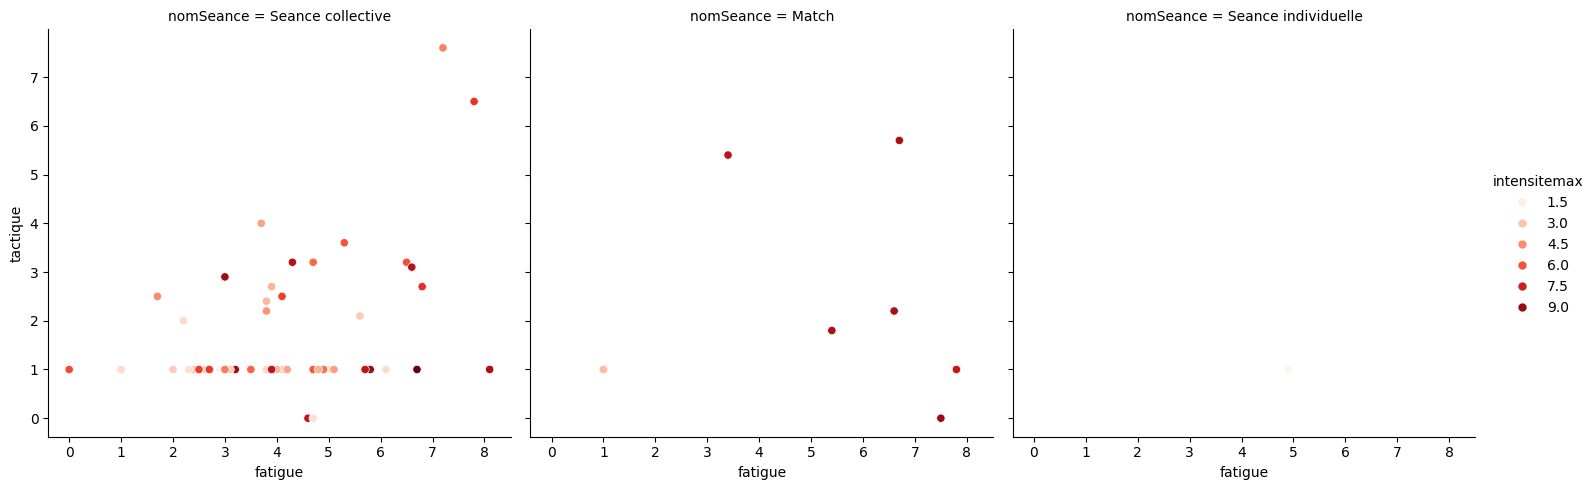

In [12]:
sns.relplot(data=data_s, x='fatigue', y='tactique', col='nomSeance', hue='intensitemax', palette='Reds')
plt.show()

### 2.2 lineplot

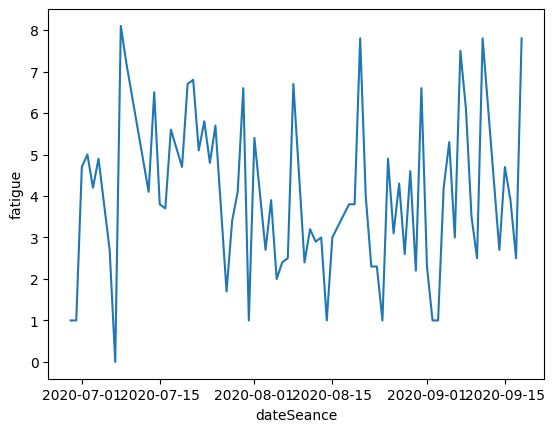

In [13]:
sns.lineplot(data=data_s, x='dateSeance', y='fatigue')
plt.show()

# 3. Distribution

### 3.1 displot

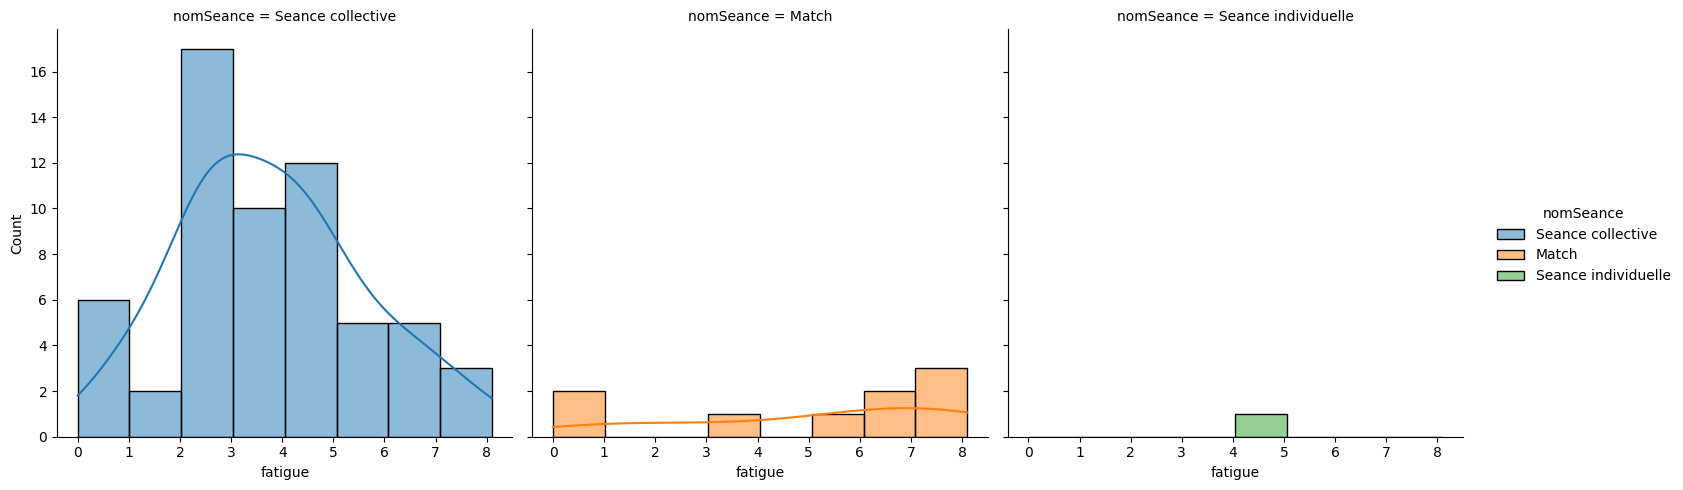

In [19]:
sns.displot(data=data_s, x='fatigue', kde=True, col='nomSeance', hue='nomSeance')
plt.show()

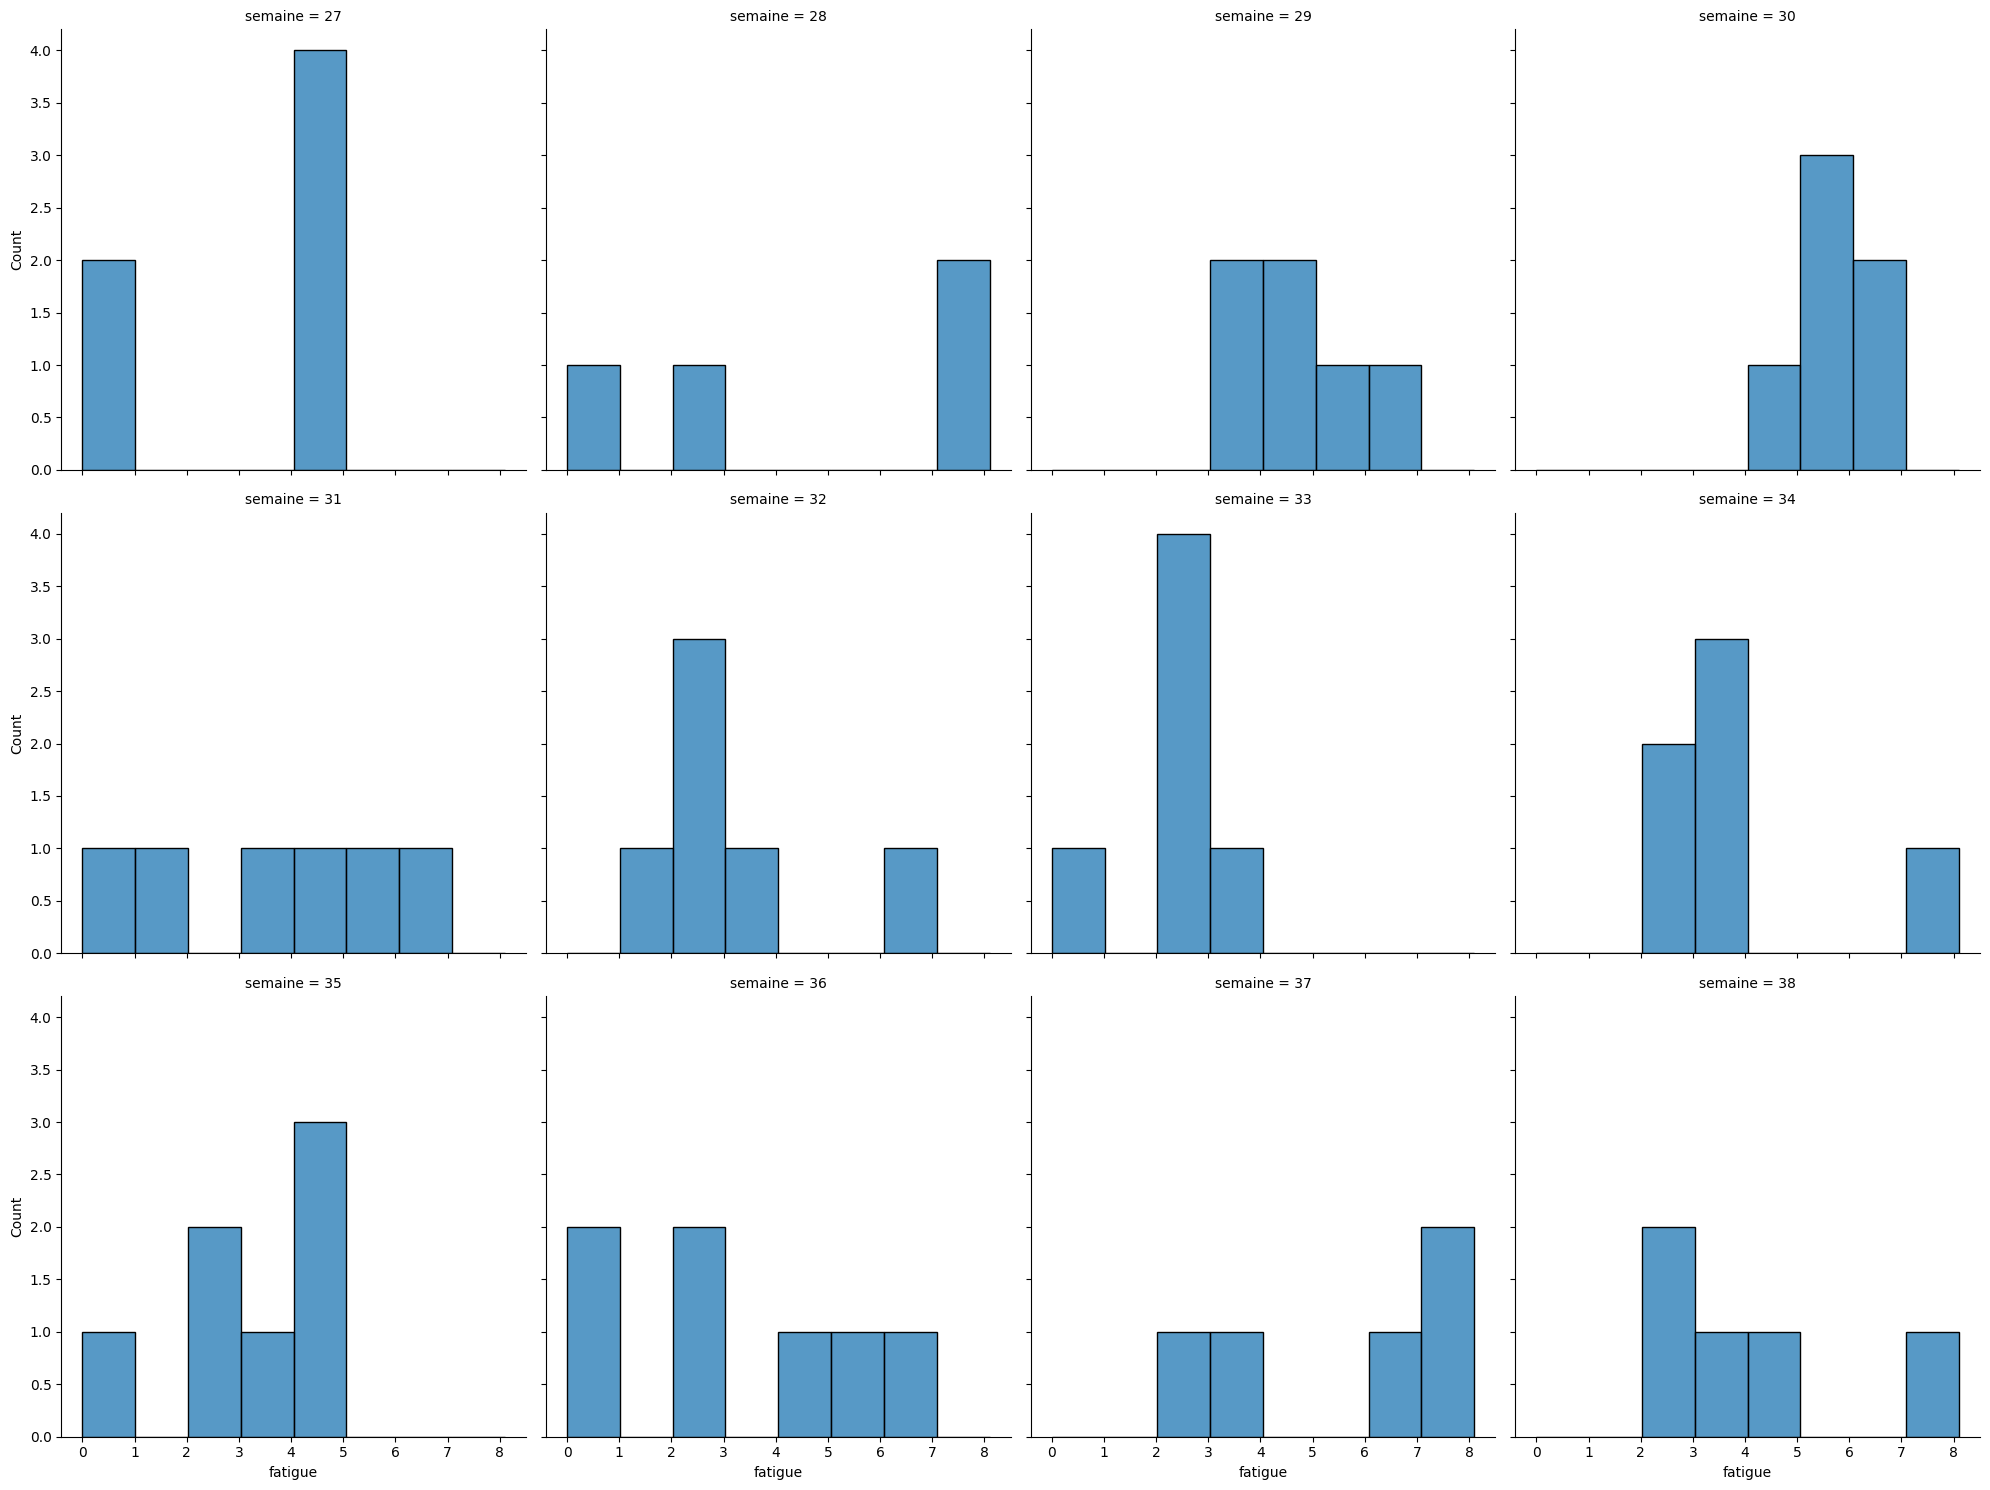

In [21]:
sns.displot(data=data_s, x='fatigue', col='semaine', col_wrap=4)
plt.show()

In [22]:
markers = ['monotonie', 'animationpeda', 'intensitemax', 'intensitemoy', 'energie',
           'sensations', 'technique', 'tactique', 'penibilite', 'difficulte',
           'concentration', 'confiancesoi', 'estimesoi', 'humeur', 'plaisir',
           'stress', 'motivation', 'vigueur', 'sommeil', 'bienetresocial',
           'bienetre', 'bienetrefamilial', 'recuperer', 'fatigue',
           'viepersonnelle', 'vieprofessionnelle', 'viegroupe']

data_s_melt = pd.melt(data_s, id_vars=['nomSeance', 'dateSeance', 'sportif'],
                      value_vars=markers, var_name='Marqueur', value_name='Saisie')
data_s_melt

,nomSeance,dateSeance,sportif,Marqueur,Saisie
0,Seance collective,2020-06-29,Sportif_26,monotonie,1.8
1,Seance collective,2020-06-30,Sportif_26,monotonie,1.7
2,Seance collective,2020-07-01,Sportif_26,monotonie,8.9
3,Seance collective,2020-07-02,Sportif_26,monotonie,2.1
4,Seance collective,2020-07-03,Sportif_26,monotonie,3.9
...,...,...,...,...,...
1885,Seance collective,2020-09-14,Sportif_26,viegroupe,1.0
1886,Seance collective,2020-09-15,Sportif_26,viegroupe,1.0
1887,Seance collective,2020-09-16,Sportif_26,viegroupe,1.0
1888,Seance collective,2020-09-17,Sportif_26,viegroupe,1.0


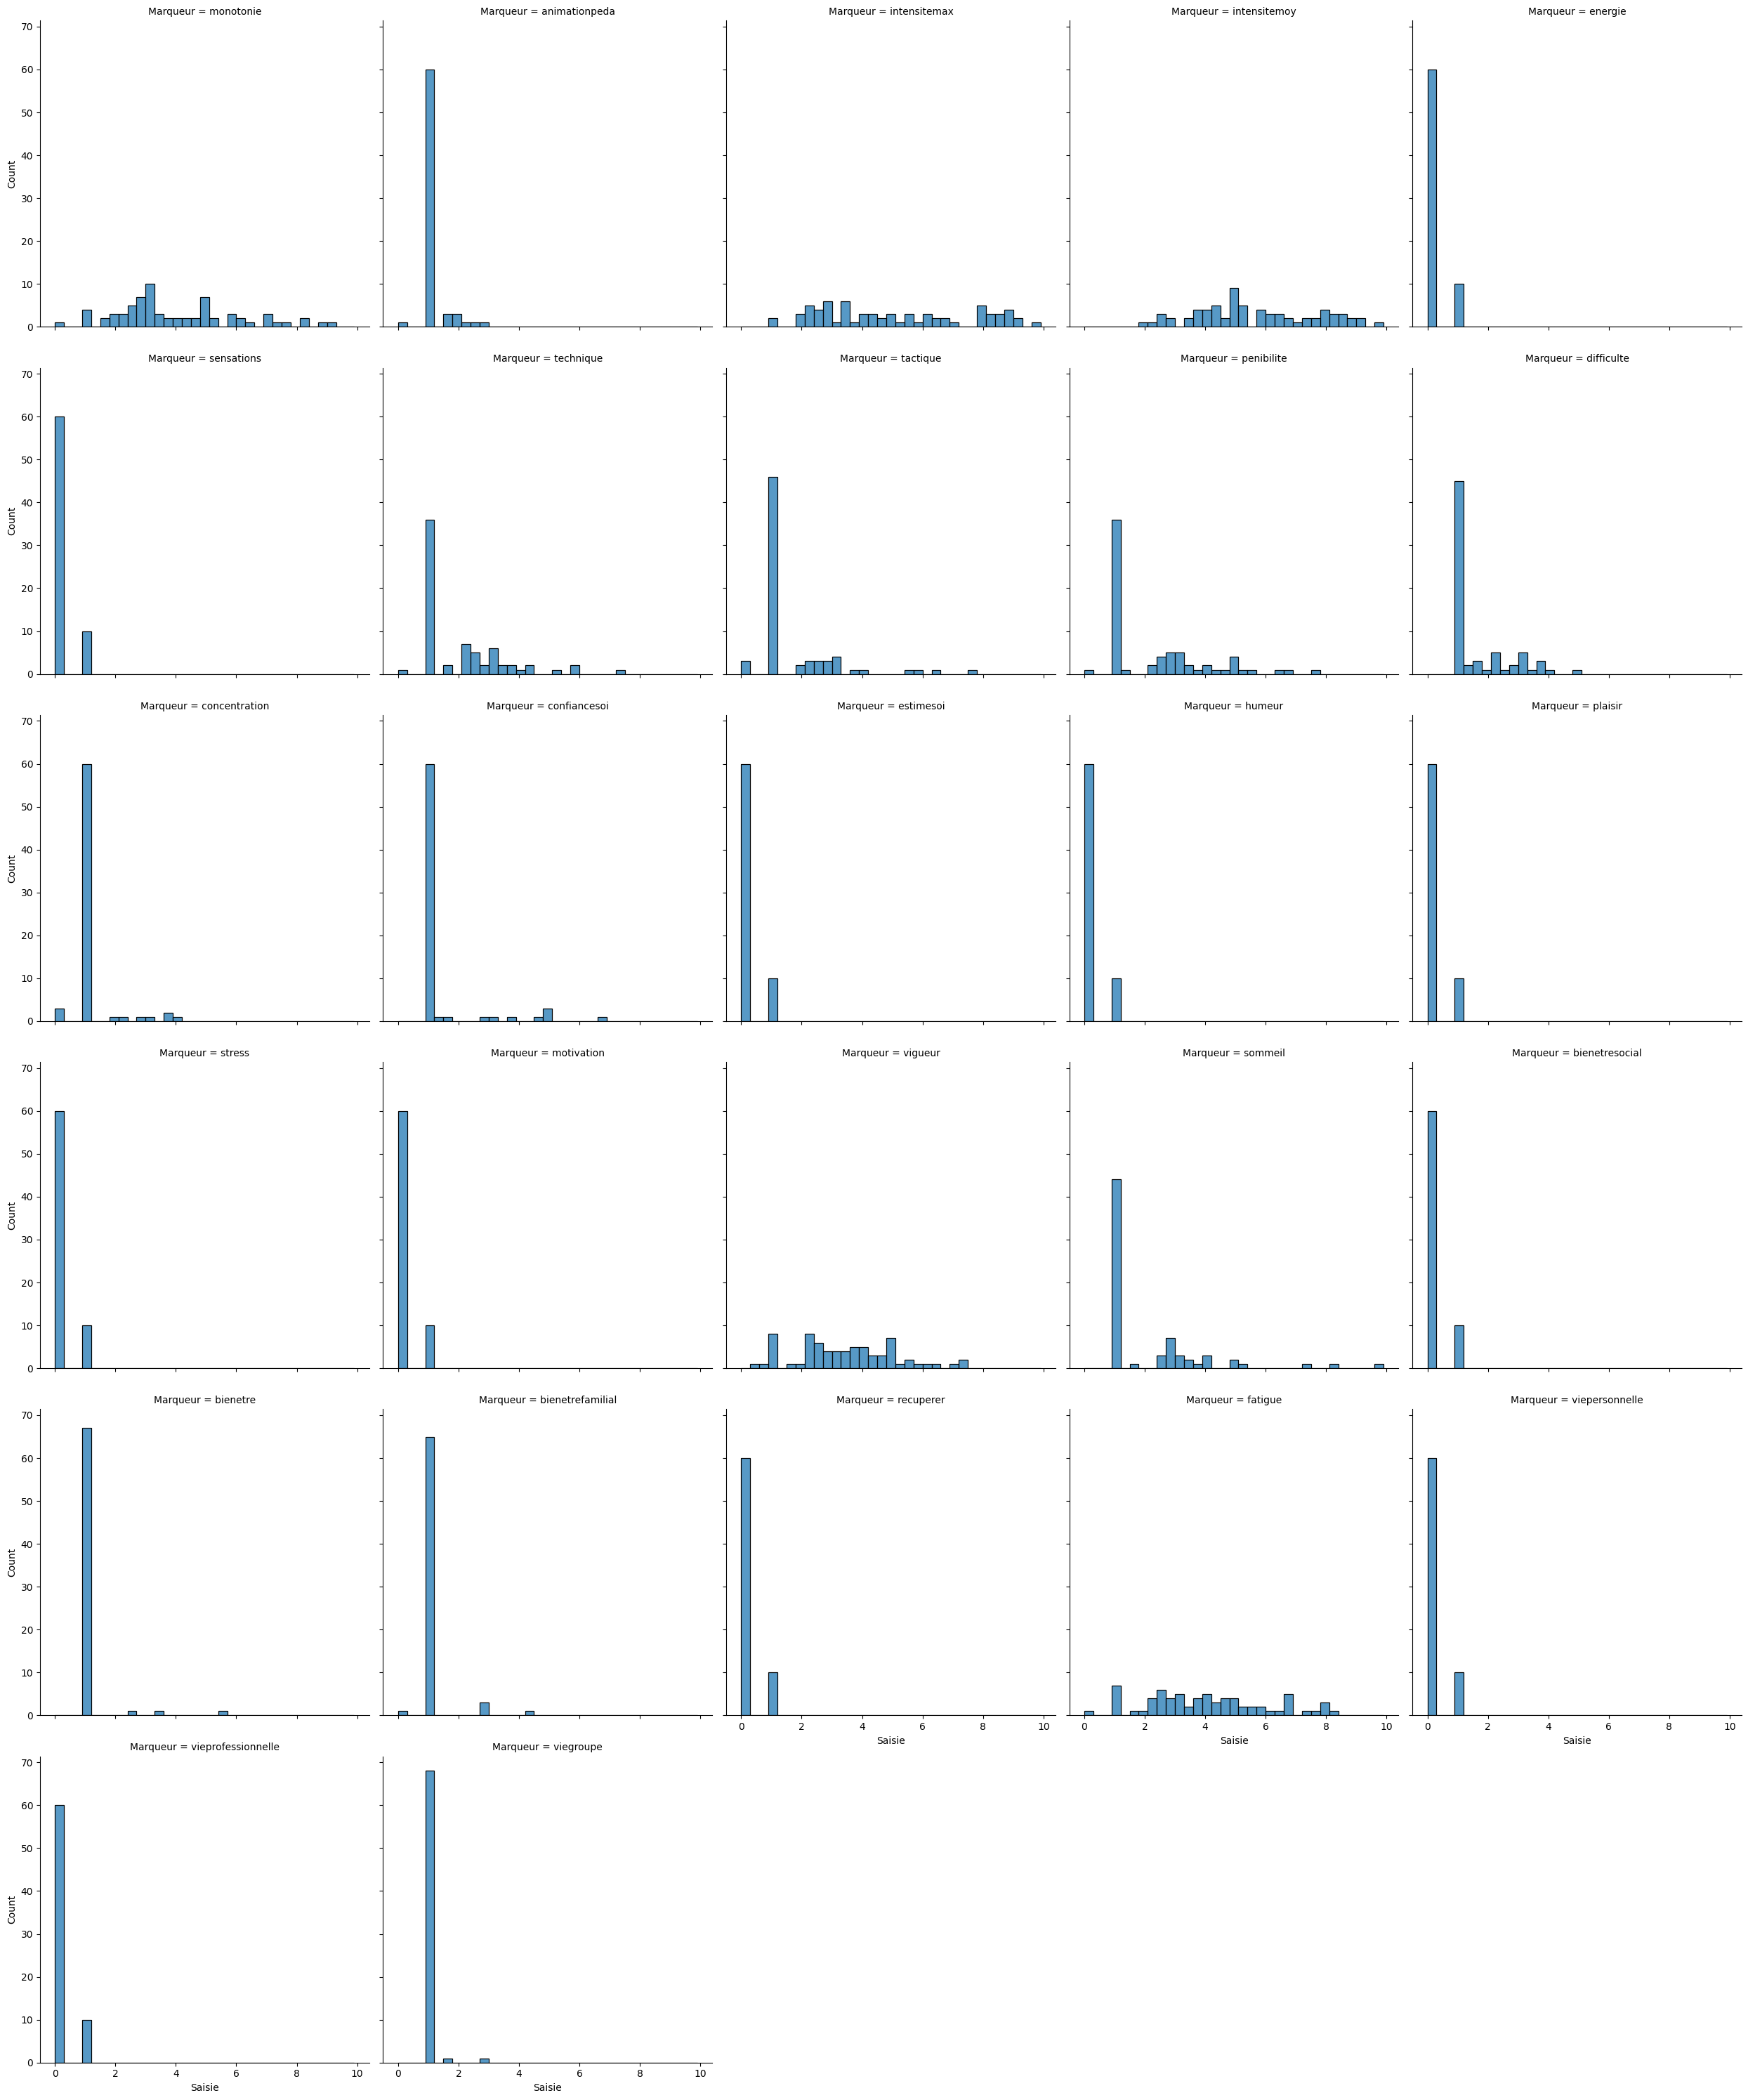

In [23]:
sns.displot(data=data_s_melt, x='Saisie', col='Marqueur', col_wrap=5)
plt.show()

C:\Users\raflg\AppData\Local\Temp\ipykernel_13160\3474039290.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data_s, x='fatigue', y='tactique', kind='kde', hue='nomSeance')


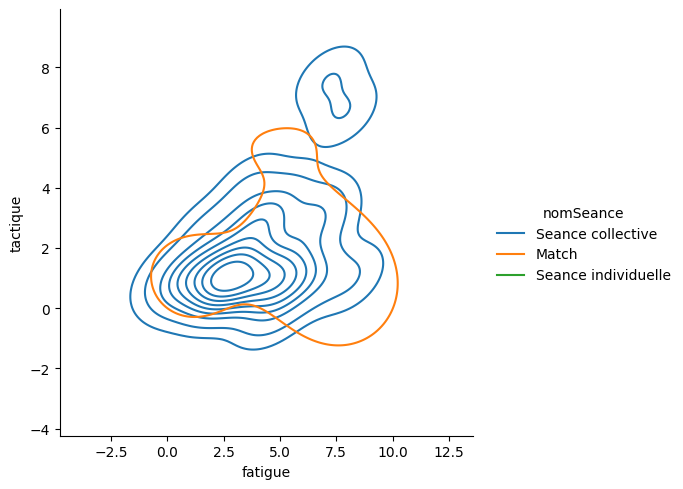

In [26]:
sns.displot(data=data_s, x='fatigue', y='tactique', kind='kde', hue='nomSeance')
plt.show()

### 3.2 histplot

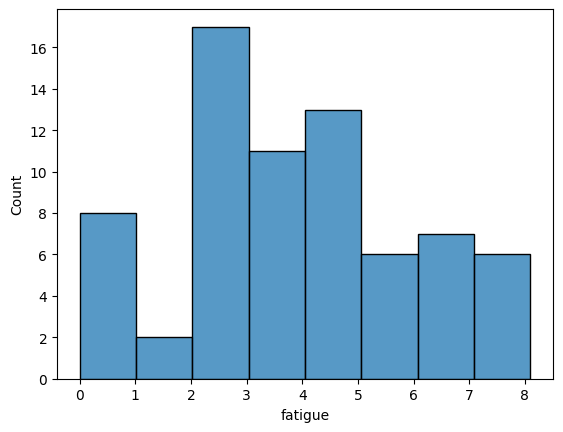

In [27]:
sns.histplot(data=data_s, x='fatigue')
plt.show()

### 3.3 kdeplot

C:\Users\raflg\AppData\Local\Temp\ipykernel_13160\425651686.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_s, x='fatigue', hue='nomSeance', multiple='stack')


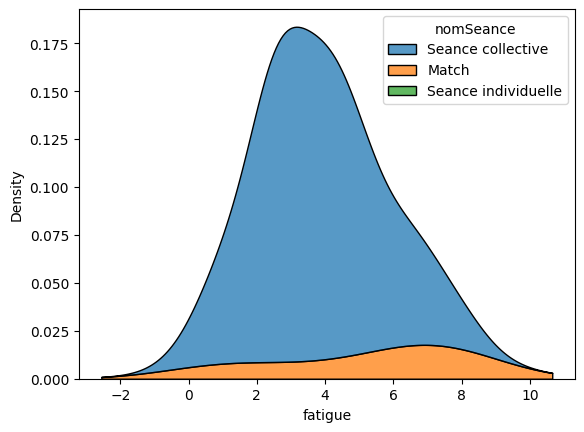

In [31]:
sns.kdeplot(data=data_s, x='fatigue', hue='nomSeance', multiple='stack')
plt.show()

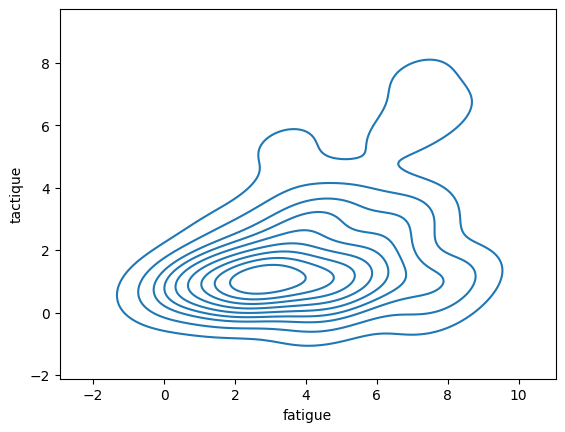

In [32]:
sns.kdeplot(data=data_s, x='fatigue', y='tactique')
plt.show()

## 4. Catégorie

### 4.1 stripplot

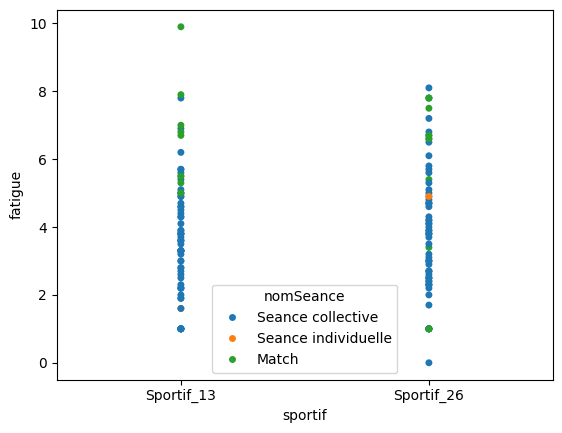

In [38]:
sns.stripplot(data=data_sp, x='sportif', y='fatigue', hue='nomSeance', jitter=False)
plt.show()

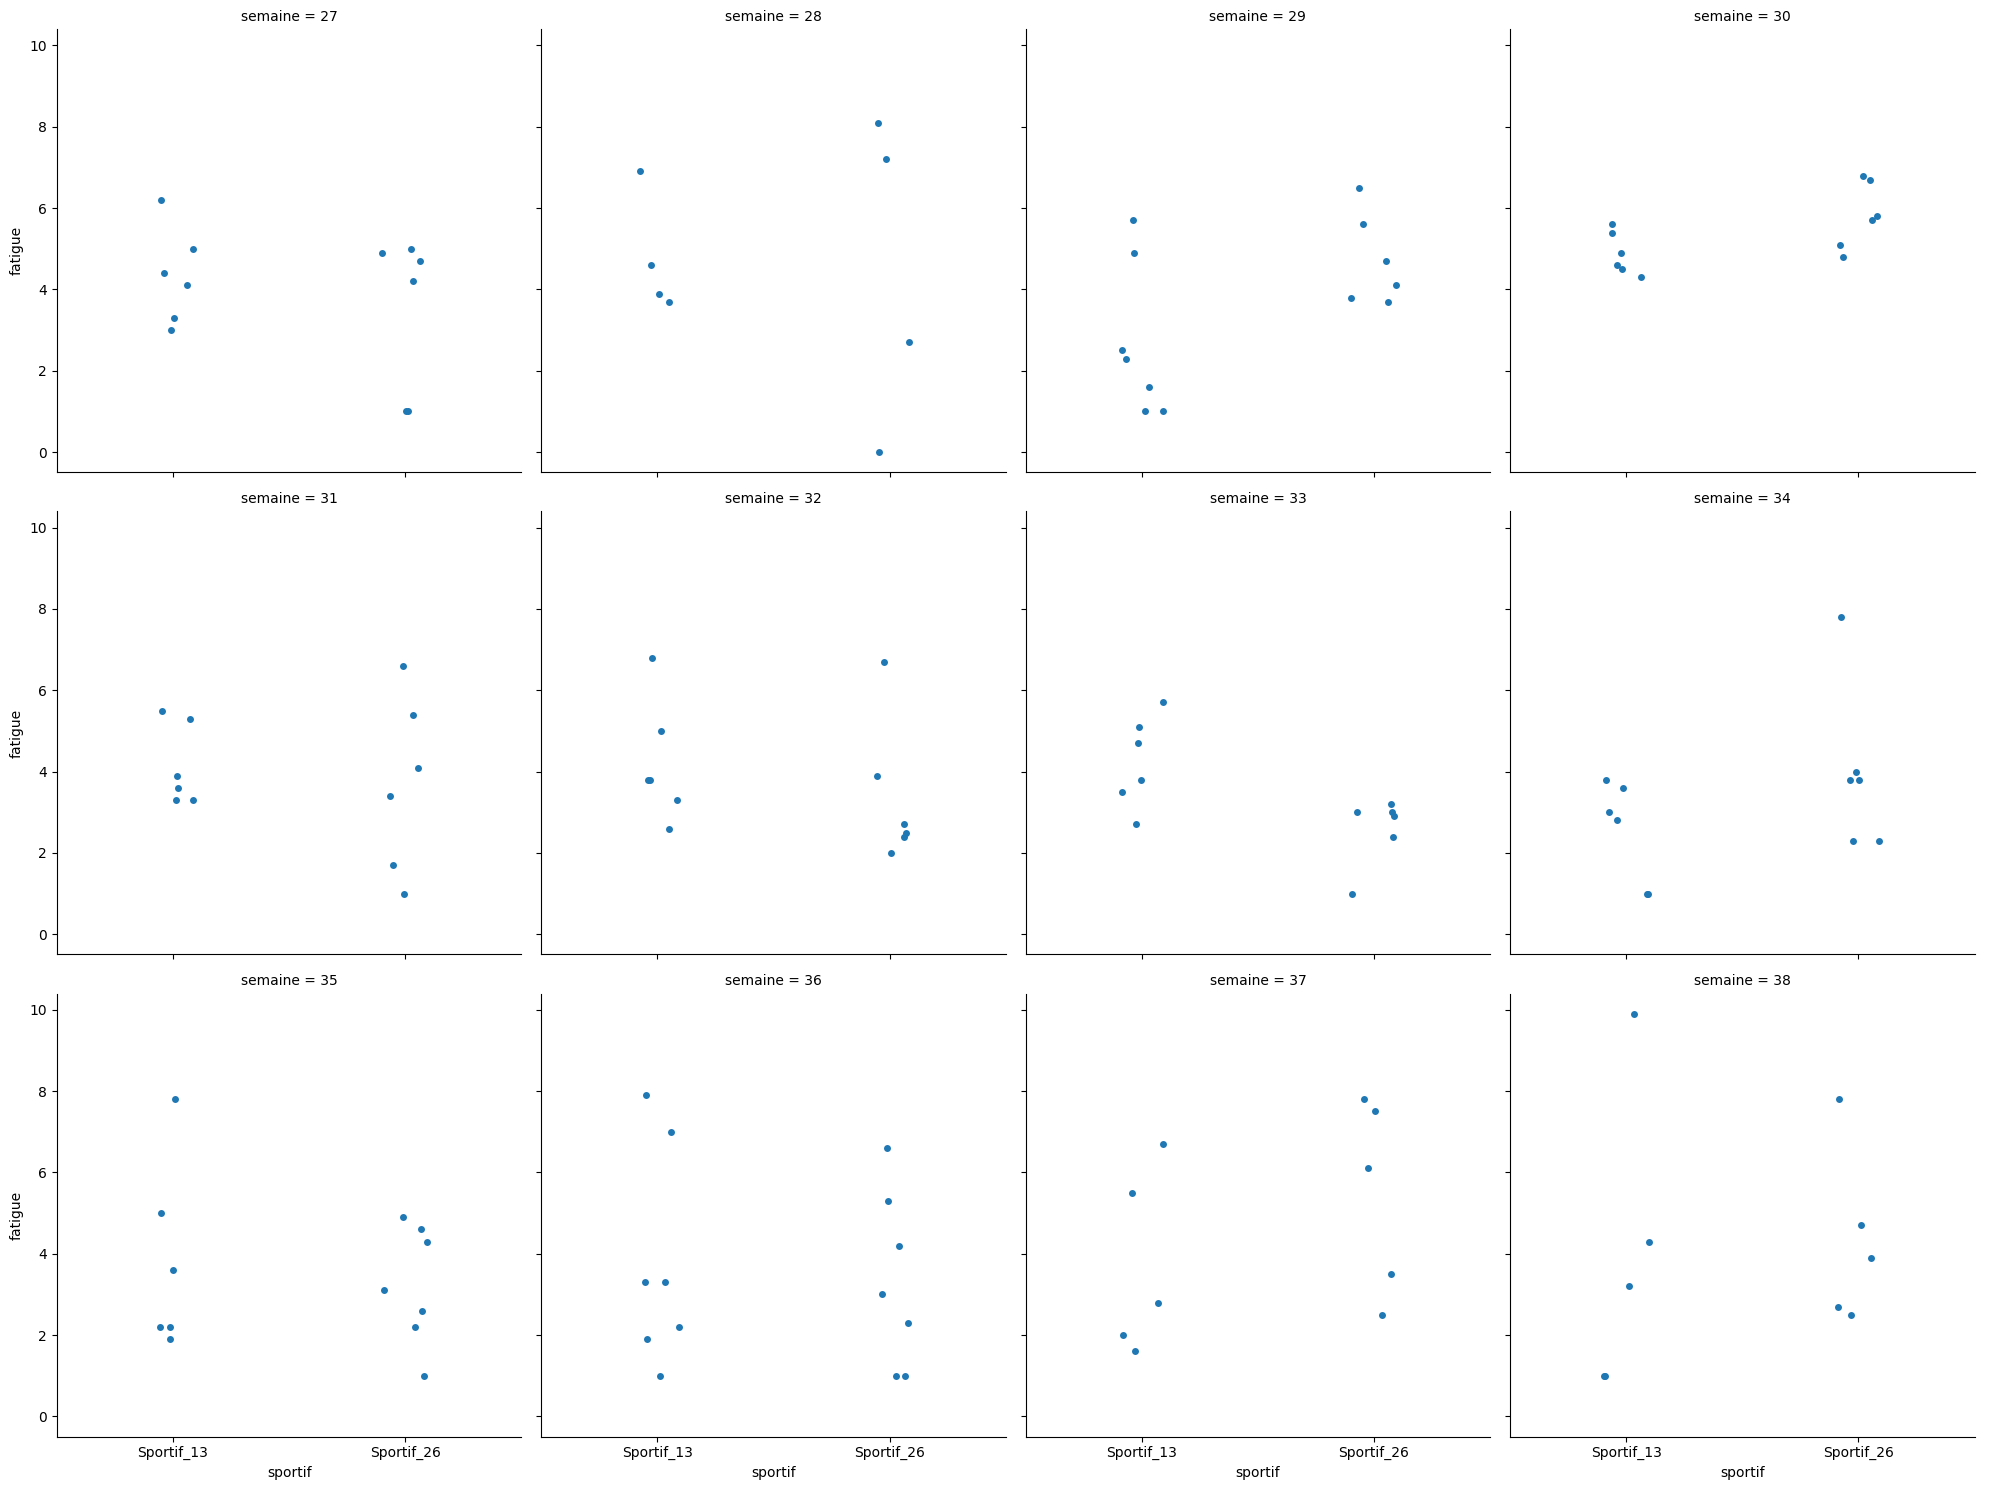

In [39]:
sns.catplot(data=data_sp, x='sportif', y='fatigue', col='semaine', col_wrap=4)
plt.show()

### 4.2 swarmplot

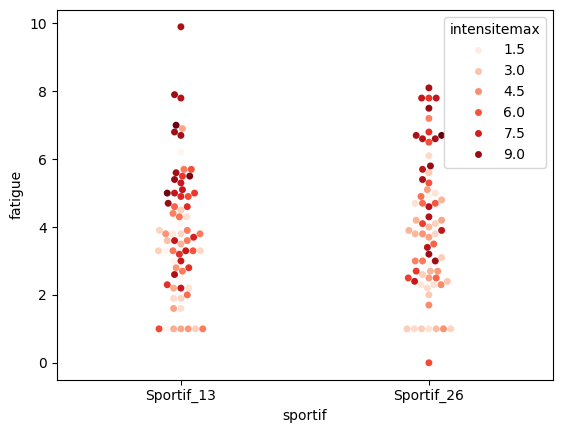

In [41]:
sns.swarmplot(data=data_sp, x='sportif', y='fatigue', hue='intensitemax', palette='Reds')
plt.show()

### 4.3 boxplot

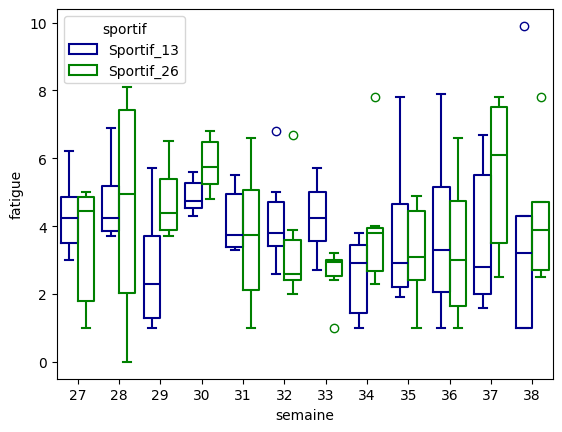

In [46]:
sns.boxplot(data=data_sp, x='semaine', y='fatigue', hue='sportif',
            palette={'Sportif_13': 'darkblue', 'Sportif_26': 'green'}, fill=False)
plt.show()

### 4.4 violinpot

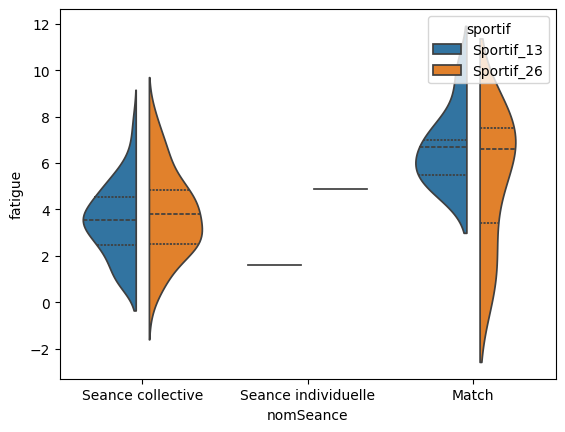

In [53]:
sns.violinplot(data=data_sp, x='nomSeance', y='fatigue', hue='sportif', split=True, gap=.2, inner='quart')
plt.show()

## 5. Régression

### 5.1 lmplot

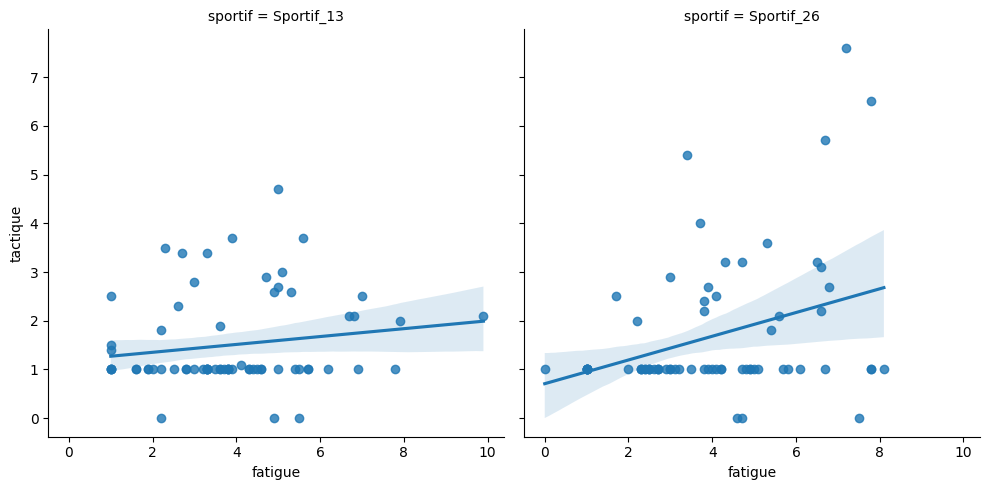

In [56]:
sns.lmplot(data=data_sp, x='fatigue', y='tactique', col='sportif')
plt.show()

### 5.2 heatmap

In [58]:
markers_list = ['intensitemax', 'intensitemoy', 'technique', 'tactique', 'difficulte', 'plaisir', 'fatigue', 'viegroupe']

data_corr = data_s[markers_list].copy()

In [62]:
corr_tbl = data_corr.corr(method='spearman')

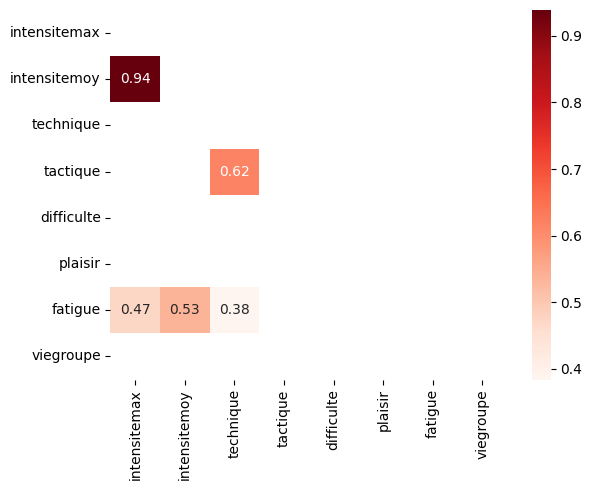

In [68]:
matrix = np.triu(corr_tbl)
# sns.heatmap(corr_tbl, annot=True, cmap='Reds', mask=matrix)
filt_corr = corr_tbl[(corr_tbl>.3) | (corr_tbl<-.3)]
filt_matrix = np.triu(filt_corr)
sns.heatmap(filt_corr, annot=True, cmap='Reds', mask=filt_matrix)
plt.show()

## 6. Multi-plots

### 6.1 pairplot

In [69]:
data_s_pp = data_s[['nomSeance', 'intensitemax', 'technique', 'tactique', 'fatigue']].copy()

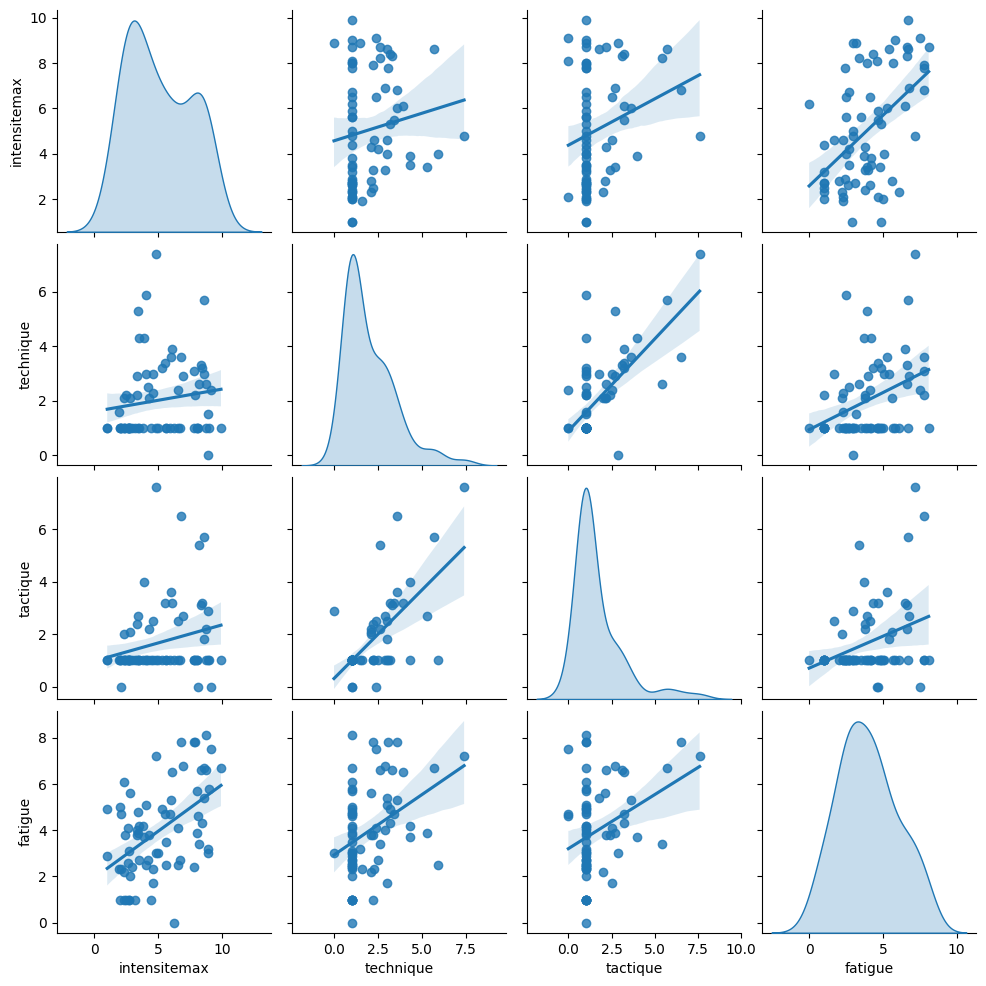

In [73]:
sns.pairplot(data_s_pp, kind='reg', diag_kind='kde')
plt.show()

### 6.2 jointplot

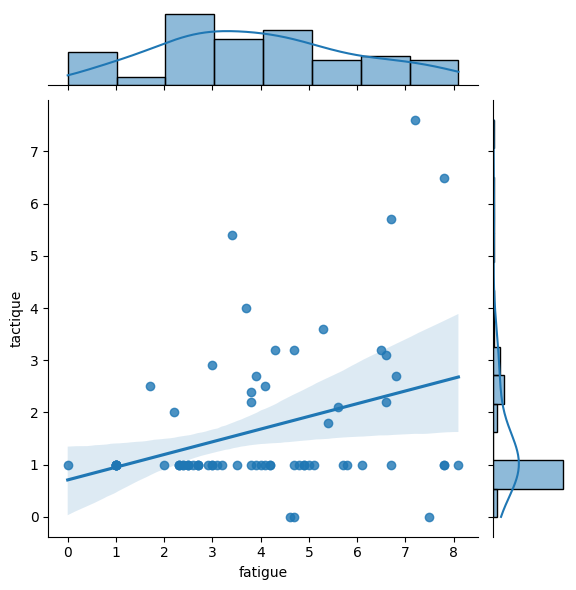

In [76]:
sns.jointplot(data=data_s, x='fatigue', y='tactique', kind='reg')
plt.show()

## 7. Combinaisons

c:\Users\raflg\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


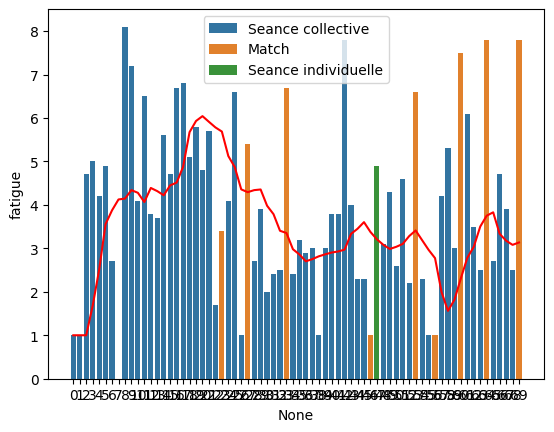

In [78]:
sns.barplot(data=data_s, x=data_s.index, y='fatigue', hue='nomSeance')
sns.lineplot(data=data_s, x=data_s.index, y='fatigue_tdc', color='red')
plt.show()

## 8. Améliorations

Styles:
- darkgrid
- whitegrid
- dark
- white
- ticks

Contextes:
- paper
- notebook
- talk
- poster

In [81]:
sns.set_style('white')

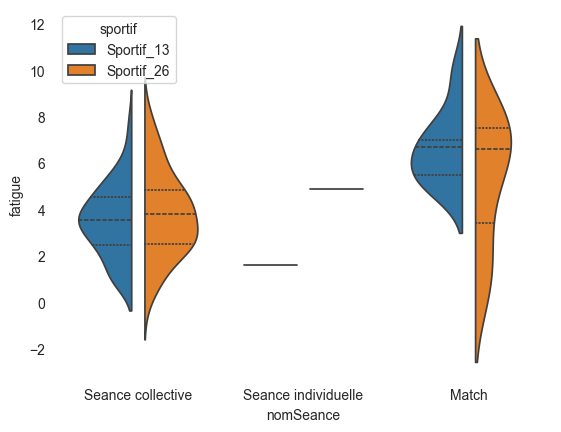

In [84]:
ax = sns.violinplot(data=data_sp, x='nomSeance', y='fatigue', hue='sportif', split=True, gap=.2, inner='quart')
sns.move_legend(ax, 'upper left')
sns.despine(left=True, bottom=True)
plt.show()

## 9. Seaborn + Matplotlib

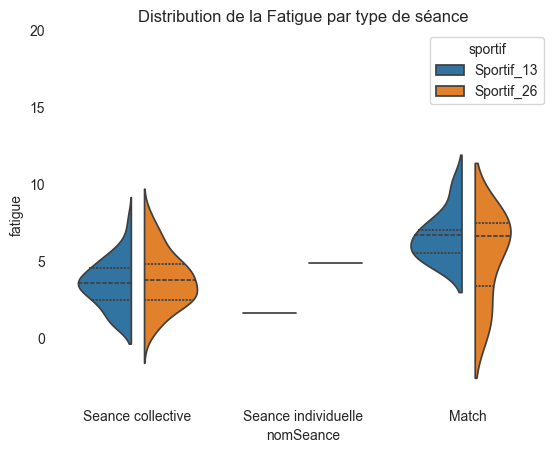

In [90]:
fig, ax = plt.subplots()
sns.violinplot(data=data_sp, x='nomSeance', y='fatigue', hue='sportif', split=True, gap=.2, inner='quart', ax=ax)
ax.set_ylim((-4, 20))
ax.set_title('Distribution de la Fatigue par type de séance')
# ax.spines[:].set_visible(False)
sns.despine(left=True, bottom=True)
plt.show()

## 10. Enregistrer

In [91]:
fig.savefig('violin_seance', bbox_inches='tight')